In [1]:
# Importing all the required libraries
import os
import cv2
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model  import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [2]:
# Defining dataset location and displaying all the classes
datasetPath = './flowers/'
os.listdir(datasetPath)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
# Function to load, convert and resize the images in the dataset and returning as the array of vectors along with the labels
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 200
def get_data(data_dir):
    data = [] 
    targets = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), 0)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append(resized_arr)
                targets.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(targets)


In [4]:
# calling the function to load the dataset
data, targets = get_data(datasetPath)

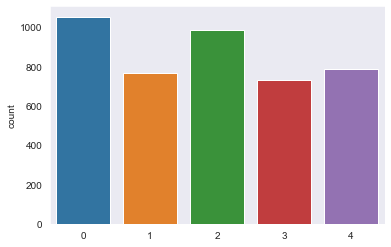

In [5]:
# Displaying the barchart with the number of images in the each category
sns.set_style('dark')
sns.countplot(targets)
plt.show()

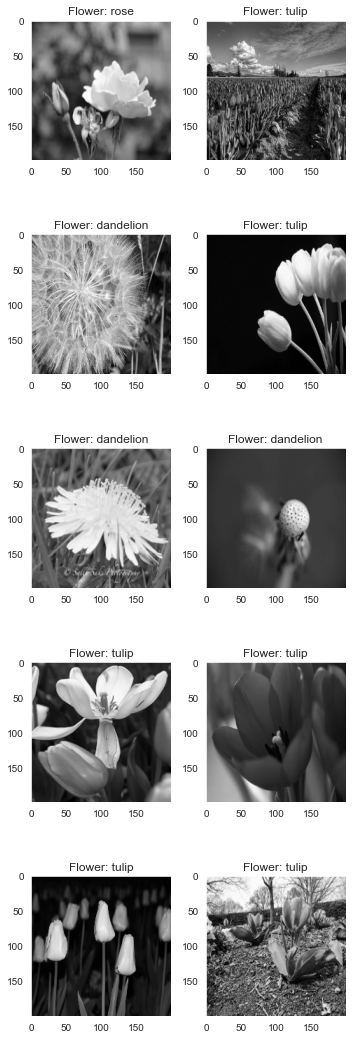

In [6]:
# Displaying the sample images from the dataset
fig,ax=plt.subplots(5,2)
fig.set_size_inches(5,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l], cmap='gray')
        ax[i,j].set_title('Flower: '+labels[targets[l]])
        
plt.tight_layout()

In [9]:
# Display the dimension of the dataset
data.shape, targets.shape

((4317, 40000), (4317,))

In [10]:
# Converting 2D array to 1D array
data = data.reshape(4317, 40000)

In [11]:
# Normalizing using min/max approach 
X = MinMaxScaler().fit_transform(data)

In [12]:
#splitting dataset into train and test sets
print("splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = tts(X, targets, test_size=0.2, random_state=42)

splitting dataset into train and test sets...


In [13]:
# Function to compute cost/loss for SGD
def compute_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = reg_strength * (np.sum(distances) / N)   
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [14]:
# Function to calculate gradients for SGD
def calculate_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch)in [np.float64, np.int64]:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
        dw += di
    dw = dw/len(Y_batch)  # average
    return dw

In [15]:
# Functions for SGD algorithm
def sgd(features, outputs):
    max_epochs = 500
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.001  # in percent
    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            prev_cost = cost
            nth += 1
    return weights

In [16]:
# model initialization
reg_strength = 1
learning_rate = 1

# print("training started...")
# W = sgd(X_train, y_train)
# print("training finished.")
# print("weights are: {}".format(W))

In [17]:
# Function to train the model
def trainingModels(model, trainX, trainY):
    model.fit(trainX, trainY)
    return model

In [18]:
# Function to predict the class for the test data also to evaluate the performance of the model
def predicting(model,testX, testY):
    predY = model.predict(testX)
    score = accuracy_score(predY, testY)
    return score, recall_score(predY, testY, average='weighted'), precision_score(predY, testY, average='weighted')

In [19]:
# Defining SVM, SGD, Random forest algorithm
svm = SVC(probability=True)
rf = RandomForestClassifier(n_estimators=150)
sgd = SGDClassifier()

In [20]:
# Initializing all the model to train the dataset
print("Training")
print("Model --> SVM")
svmModel = trainingModels(svm, X_train, y_train)

print("Model --> RF")
rfModel = trainingModels(rf, X_train, y_train)

print("Model --> SGD")
sgdModel = trainingModels(sgd, X_train, y_train)

Training
Model --> SVM
Model --> RF
Model --> SGD


In [21]:
# evaluating the model
scores = predicting(svmModel, X_test, y_test)
print("~~~~ Scores of SVM model ~~~~")
print("\tAccuracy score: {:.2f}".format(scores[0]))
print("\tRecall score: {:.2f}".format(scores[1]))
print("\tPrecision score: {:.2f}".format(scores[2]))

~~~~ Scores of SVM model ~~~~
	Accuracy score: 0.42
	Recall score: 0.42
	Precision score: 0.50


In [22]:
scores = predicting(rfModel, X_test, y_test)
print("~~~~ Scores of Random Forest model ~~~~")
print("\tAccuracy score: {:.2f}".format(scores[0]))
print("\tRecall score: {:.2f}".format(scores[1]))
print("\tPrecision score: {:.2f}".format(scores[2]))

~~~~ Scores of Random Forest model ~~~~
	Accuracy score: 0.42
	Recall score: 0.42
	Precision score: 0.47


In [23]:
scores = predicting(sgd, X_test, y_test)
print("~~~~ Scores of SGD model ~~~~")
print("\tAccuracy score: {:.2f}".format(scores[0]))
print("\tRecall score: {:.2f}".format(scores[1]))
print("\tPrecision score: {:.2f}".format(scores[2]))

~~~~ Scores of SGD model ~~~~
	Accuracy score: 0.25
	Recall score: 0.25
	Precision score: 0.33


In [31]:
# Loading random test image
testImage = cv2.imread("./flowers/daisy/305160642_53cde0f44f.jpg", 0)

In [32]:
# resizing test image
image = cv2.resize(testImage, (200,200), 0)

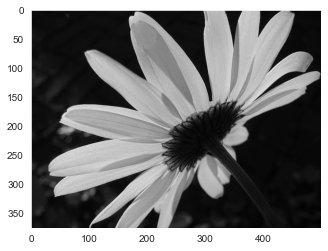

In [33]:
# Plotting test image
plt.imshow(testImage, cmap='gray')
plt.show()

In [34]:
# Converting test image from 2D to 1D
image = image.reshape(40000)

In [35]:
# Predicting the label for test image
yp = svmModel.predict([image])

In [36]:
yp

array([1])

In [37]:
print("Predicted flower is {} with score {:.3f}".format(labels[int(yp)], np.max(svmModel.predict_proba([image]))))

Predicted flower is daisy with score 0.419
